In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('fear_greed_index.csv')

In [3]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
# preprocesiing the data
from sklearn.preprocessing import LabelEncoder
# Encode target: Fear=0, Greed=1
df['Sentiment'] = df['classification'].map({'Fear': 0, 'Greed': 1})

# Feature engineering: use lag features
df = df.sort_values('date')
df['Prev_Sentiment'] = df['Sentiment'].shift(1)
df.dropna(inplace=True)

# Encode categorical labels
le = LabelEncoder()
df['Sentiment_enc'] = le.fit_transform(df['Sentiment'])
df['Prev_Sentiment_enc'] = le.transform(df['Prev_Sentiment'])

# Features and target
X = df[['Prev_Sentiment_enc']]  
y = df['Sentiment_enc']

In [9]:
df.head()

,timestamp,value,classification,date,Sentiment,Prev_Sentiment,Sentiment_enc,Prev_Sentiment_enc
7,1518067800,30,Fear,2018-02-08,0.0,0.0,0,0
8,1518154200,44,Fear,2018-02-09,0.0,0.0,0,0
11,1518413400,42,Fear,2018-02-12,0.0,0.0,0,0
12,1518499800,35,Fear,2018-02-13,0.0,0.0,0,0
13,1518586200,55,Greed,2018-02-14,1.0,0.0,1,0


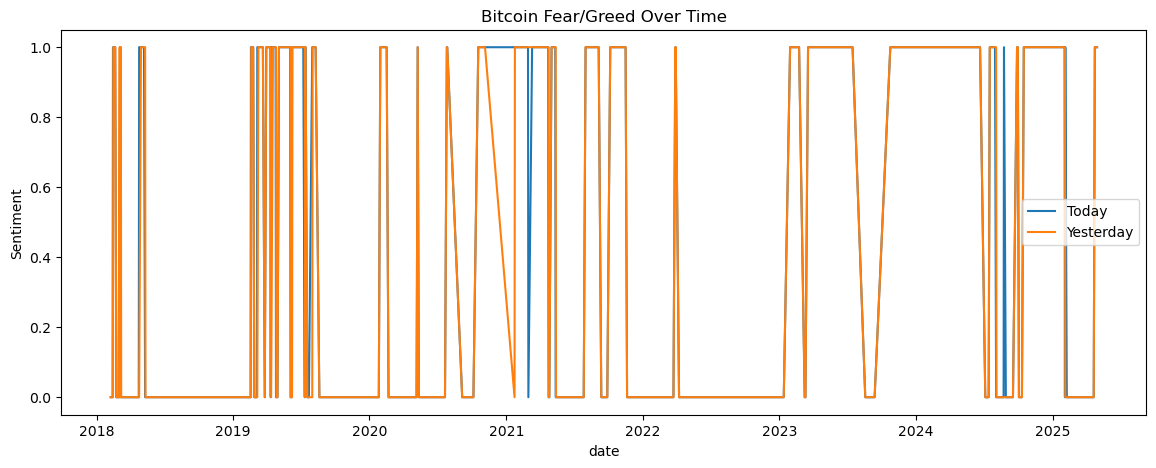

In [10]:
# data visiualization by lineplot
plt.figure(figsize=(14, 5))
sns.lineplot(x='date', y='Sentiment', data=df, label='Today')
sns.lineplot(x='date', y='Prev_Sentiment', data=df, label='Yesterday')
plt.title('Bitcoin Fear/Greed Over Time')
plt.show()

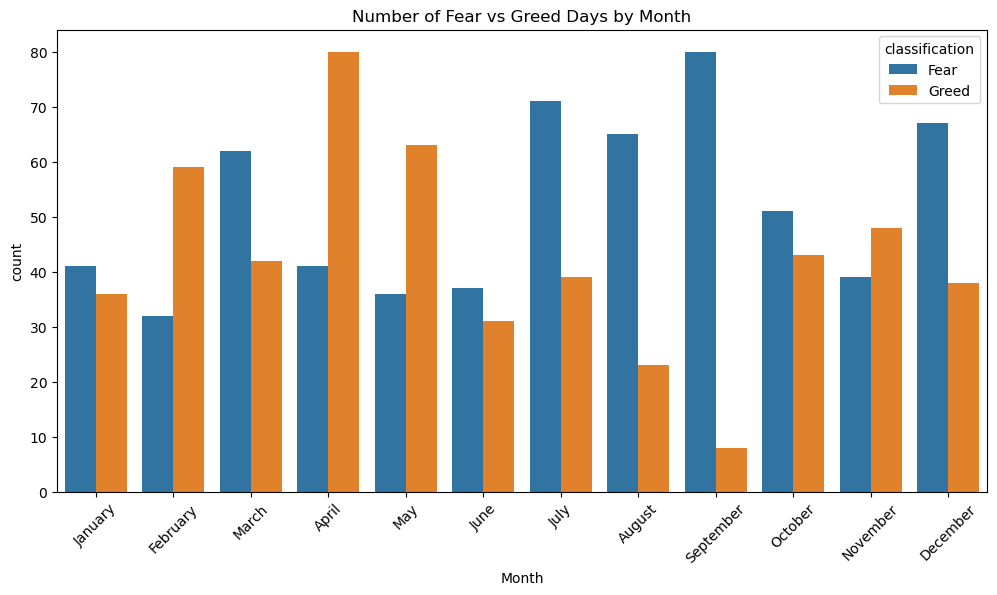

In [11]:
#Bar plot
df['Month'] = df['date'].dt.month_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='classification', data=df,
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Fear vs Greed Days by Month')
plt.xticks(rotation=45)
plt.show()

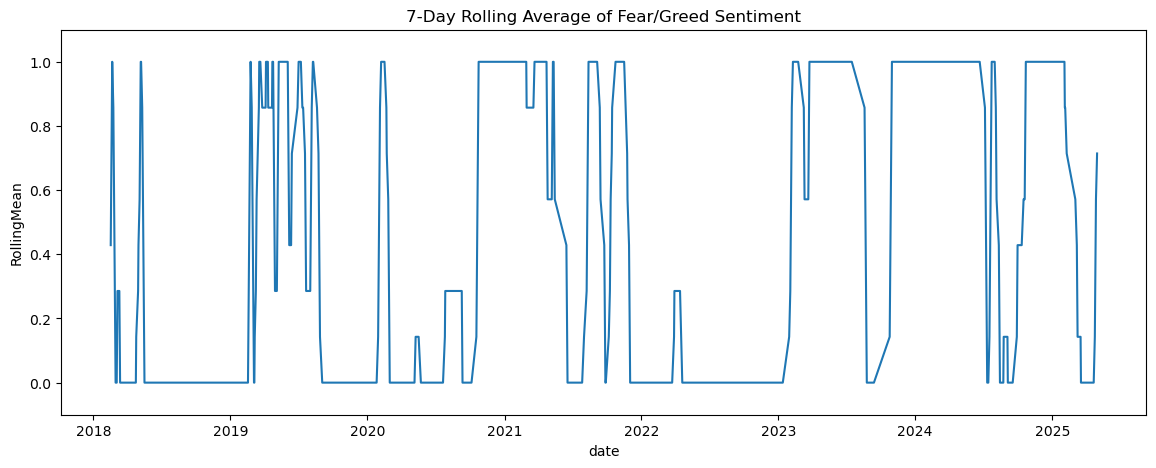

In [12]:
# Rolling Average Plot — Smooth Sentiment Trend
df['RollingMean'] = df['Sentiment'].rolling(window=7).mean()
plt.figure(figsize=(14, 5))
sns.lineplot(x='date', y='RollingMean', data=df)
plt.title('7-Day Rolling Average of Fear/Greed Sentiment')
plt.ylim(-0.1, 1.1)
plt.show()

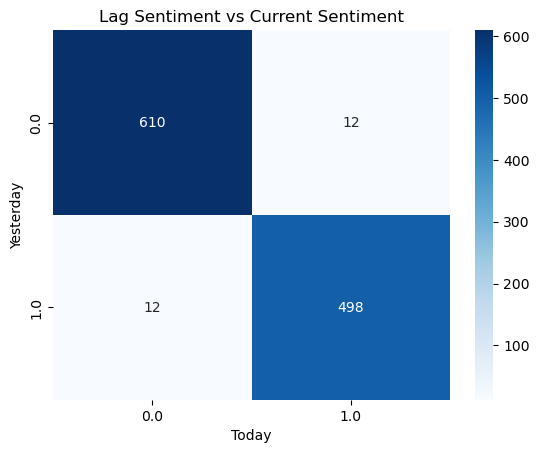

In [13]:
# Heatmap
crosstab = pd.crosstab(df['Prev_Sentiment'], df['Sentiment'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Lag Sentiment vs Current Sentiment')
plt.xlabel('Today')
plt.ylabel('Yesterday')
plt.show()

In [14]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
# accuracy, classification, confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

pred_labels = le.inverse_transform(y_pred)
print("\nPredicted next-day sentiment:", pred_labels)

Accuracy: 0.9779735682819384

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.97      0.98      0.97        97

    accuracy                           0.98       227
   macro avg       0.98      0.98      0.98       227
weighted avg       0.98      0.98      0.98       227

Confusion Matrix:
 [[127   3]
 [  2  95]]

Predicted next-day sentiment: [1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0